# Coronavirus tweets NLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
import nltk
# tokenise imports
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/shubham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv("corona_tweets.csv")

# EDA

In [3]:
#1 Understanding data

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Droped unnecessary collumns  like UserName, Location or time since these columns does not contribute to the sentiment variable

In [5]:
df1=df[['OriginalTweet','Sentiment']]

In [6]:
df1.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
df1.tail()

,OriginalTweet,Sentiment
44950,Airline pilots offering to stock supermarket s...,Neutral
44951,Response to complaint not provided citing COVI...,Extremely Negative
44952,You know its getting tough when @KameronWilds...,Positive
44953,Is it wrong that the smell of hand sanitizer i...,Neutral
44954,@TartiiCat Well new/used Rift S are going for ...,Negative


In [8]:
df1.shape

(44955, 2)

In [9]:
df1.isnull().values.any()

False

In [10]:
df1['OriginalTweet'].duplicated().any()

False

In [11]:
df1.describe()

,OriginalTweet,Sentiment
count,44955,44955
unique,44955,5
top,TRENDING: New Yorkers encounter empty supermar...,Positive
freq,1,12369


In [12]:
df1.Sentiment.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

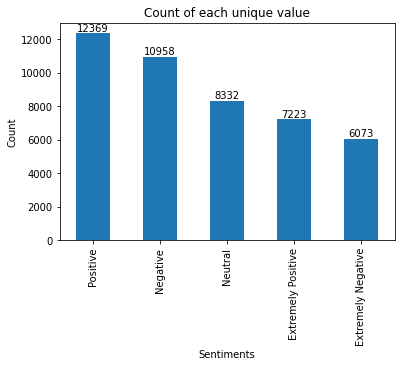

In [13]:
ax=df1['Sentiment'].value_counts().plot(kind='bar',title='Count of each unique value')
plt.ylabel('Count')
ax.set_xlabel('Sentiments')
#ax.annotate(format(bar.get_height())
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+300), ha='center', va='center')


In [14]:
df1["Sentiment"].replace({"Extremely Negative": "Negative", "Extremely Positive": "Positive"}, inplace=True)

In [15]:
df1.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


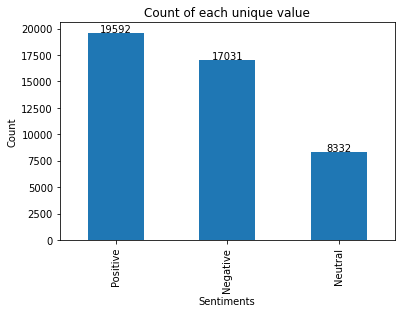

In [16]:
ax=df1['Sentiment'].value_counts().plot(kind='bar',title='Count of each unique value')
plt.ylabel('Count')
ax.set_xlabel('Sentiments')
#ax.annotate(format(bar.get_height())
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+300), ha='center', va='center')

In [17]:
df1.describe()

,OriginalTweet,Sentiment
count,44955,44955
unique,44955,3
top,TRENDING: New Yorkers encounter empty supermar...,Positive
freq,1,19592


# EDA on Text

In [ ]:
totalwords=df1['OriginalTweet'].str.split().str.len()

In [ ]:
totalwords.sum()

In [ ]:
totalwords.describe()

In [ ]:
totalwords.idxmin()

In [ ]:
df1['OriginalTweet'].loc[31408]

<AxesSubplot:xlabel='OriginalTweet'>

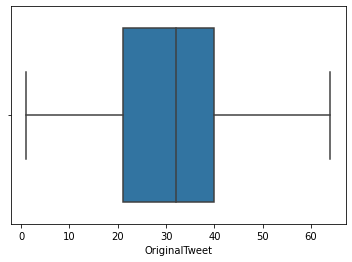

In [23]:
sns.boxplot(totalwords)

It appearse that there are no outliers present

In [24]:
# text Cleaning

In [25]:
df1.loc[44905:44910]

,OriginalTweet,Sentiment
44905,Check out our website at https://t.co/g8r7DW86...,Positive
44906,? @Amazon will begin to put new grocery delive...,Neutral
44907,IRS stimulus check portal: When and how you ca...,Positive
44908,Bruh??? It's so truuuuuue! I choked on my own ...,Negative
44909,Roughly half the Chinese restaurants in the U...,Negative
44910,@MarkDice Why dont we see the grocery store o...,Neutral


In [26]:
#custom cleaning

#urls
df1['CleanTweet']=df1['OriginalTweet'].replace(r'http\S+',' ',regex=True).replace(r'www\S+',' ',regex=True)

#@mention
df1['CleanTweet']=df1['CleanTweet'].replace(r'@[A-Za-z0-9]+',' ',regex=True)

#Emoji
df1['CleanTweet']=df1['CleanTweet'].apply(lambda x: [y.encode('ascii','ignore').decode('ascii') for y in x.split()])


In [27]:
df1.loc[44905:44910]

,OriginalTweet,Sentiment,CleanTweet
44905,Check out our website at https://t.co/g8r7DW86...,Positive,"[Check, out, our, website, at, We, currently, ..."
44906,? @Amazon will begin to put new grocery delive...,Neutral,"[?, will, begin, to, put, new, grocery, delive..."
44907,IRS stimulus check portal: When and how you ca...,Positive,"[IRS, stimulus, check, portal:, When, and, how..."
44908,Bruh??? It's so truuuuuue! I choked on my own ...,Negative,"[Bruh???, It's, so, truuuuuue!, I, choked, on,..."
44909,Roughly half the Chinese restaurants in the U...,Negative,"[Roughly, half, the, Chinese, restaurants, in,..."
44910,@MarkDice Why dont we see the grocery store o...,Neutral,"[Why, dont, we, see, the, grocery, store, owne..."


In [28]:
#regular cleaning

# remove punctuation
df1['CleanTweet']= df1['CleanTweet'].astype(str).str.replace(r'[^\w\d\s]', ' ')

# replace multiple spaces with single space in between text
df1['CleanTweet']=df1['CleanTweet'].str.replace(r'\s+',' ')

# change to lower case
df1['CleanTweet']=df1['CleanTweet'].astype(str).str.lower()

#remove numbers
df1['CleanTweet']= df1['CleanTweet'].astype(str).str.replace(r'\d+', ' ')

df1.loc[44905:44910]


,OriginalTweet,Sentiment,CleanTweet
44905,Check out our website at https://t.co/g8r7DW86...,Positive,check out our website at we currently have a ...
44906,? @Amazon will begin to put new grocery delive...,Neutral,will begin to put new grocery delivery custom...
44907,IRS stimulus check portal: When and how you ca...,Positive,irs stimulus check portal when and how you ca...
44908,Bruh??? It's so truuuuuue! I choked on my own ...,Negative,bruh it s so truuuuuue i choked on my own spi...
44909,Roughly half the Chinese restaurants in the U...,Negative,roughly half the chinese restaurants in the u...
44910,@MarkDice Why dont we see the grocery store o...,Neutral,why dont we see the grocery store owners blow...


In [29]:
df1['CleanTweet'].loc[31408]

' brazil health official confirm first indigenous coronavirus case amazon chief bezos say donating   food charity covid   pandemic trump campaign demand jeff session campaign end delusional invoking ties president turkey '

In [30]:
df1.head()

,OriginalTweet,Sentiment,CleanTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,trending new yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldn t find hand sanitizer at fred m...
2,Find out how you can protect yourself and love...,Positive,find out how you can protect yourself and lov...
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious sho...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronaviru...


In [31]:
df1.loc[44905:44910]

,OriginalTweet,Sentiment,CleanTweet
44905,Check out our website at https://t.co/g8r7DW86...,Positive,check out our website at we currently have a ...
44906,? @Amazon will begin to put new grocery delive...,Neutral,will begin to put new grocery delivery custom...
44907,IRS stimulus check portal: When and how you ca...,Positive,irs stimulus check portal when and how you ca...
44908,Bruh??? It's so truuuuuue! I choked on my own ...,Negative,bruh it s so truuuuuue i choked on my own spi...
44909,Roughly half the Chinese restaurants in the U...,Negative,roughly half the chinese restaurants in the u...
44910,@MarkDice Why dont we see the grocery store o...,Neutral,why dont we see the grocery store owners blow...


In [32]:
df2=df1

In [33]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('new')
stop.append('yorkers')
stop.append('york')
stop.append('newyork')
df2['CleanTweet']=df1['CleanTweet'].apply(lambda x: [item for item in x.split() if item not in stop])


In [34]:
df2.head()

,OriginalTweet,Sentiment,CleanTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,"[trending, encounter, empty, supermarket, shel..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, turned, a..."
2,Find out how you can protect yourself and love...,Positive,"[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronav..."


In [35]:
df2.loc[44905:44910]

,OriginalTweet,Sentiment,CleanTweet
44905,Check out our website at https://t.co/g8r7DW86...,Positive,"[check, website, currently, sale, products, ge..."
44906,? @Amazon will begin to put new grocery delive...,Neutral,"[begin, put, grocery, delivery, customers, wai..."
44907,IRS stimulus check portal: When and how you ca...,Positive,"[irs, stimulus, check, portal, track, covid, r..."
44908,Bruh??? It's so truuuuuue! I choked on my own ...,Negative,"[bruh, truuuuuue, choked, spit, wearing, mask,..."
44909,Roughly half the Chinese restaurants in the U...,Negative,"[roughly, half, chinese, restaurants, united, ..."
44910,@MarkDice Why dont we see the grocery store o...,Neutral,"[dont, see, grocery, store, owners, blowing, s..."


In [36]:
# remove punctuation
df2['CleanTweet']= df2['CleanTweet'].astype(str).str.replace(r'[^\w\d\s]', ' ')

# replace multiple spaces with single space in between text
df2['CleanTweet']=df2['CleanTweet'].astype(str).str.replace(r'\s+',' ')

# removie leading and trailing 
df2['CleanTweet']=df2['CleanTweet'].astype(str).str.replace(r'^\s+|\s+?$','')


In [37]:
df2.head()

,OriginalTweet,Sentiment,CleanTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,trending encounter empty supermarket shelves p...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanitizer fred meyer turned amazon p...
2,Find out how you can protect yourself and love...,Positive,find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


count    44955.000000
mean        17.749372
std          6.586503
min          0.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         42.000000
Name: CleanTweet, dtype: float64

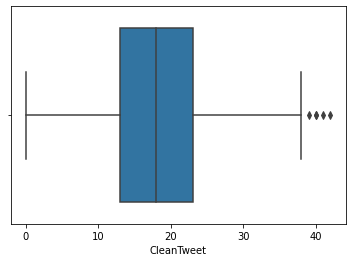

In [38]:
totalwords1=df2['CleanTweet'].astype(str).str.split().str.len()
sns.boxplot(totalwords1)
totalwords1.describe()

In [39]:
totalwords1.idxmin()

6183

In [40]:
totalwords1.head()

0    17
1    14
2     5
3    28
4    23
Name: CleanTweet, dtype: int64

In [41]:
df2 = df2[df2['CleanTweet'].astype(str).str.split().str.len() > 0]

In [42]:
df2.head()

,OriginalTweet,Sentiment,CleanTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,trending encounter empty supermarket shelves p...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanitizer fred meyer turned amazon p...
2,Find out how you can protect yourself and love...,Positive,find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


In [43]:
df2['CleanTweet'].loc[16207:16209]

16207    initiatives combating covid much appreciated p...
16209    covid hysteria dedicate staff putting everyone...
Name: CleanTweet, dtype: object

count    44942.000000
mean        17.754506
std          6.580533
min          1.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         42.000000
Name: CleanTweet, dtype: float64

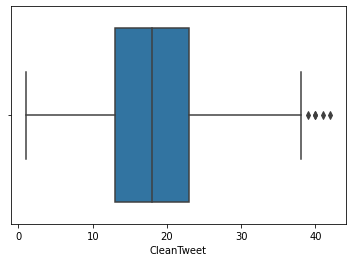

In [44]:
totalwords2=df2['CleanTweet'].astype(str).str.split().str.len()
sns.boxplot(totalwords2)
totalwords2.describe()

In [45]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].astype(str).str.split().str.len().quantile(0.25)
    q3 = df_in[col_name].astype(str).str.split().str.len().quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name].astype(str).str.split().str.len() > fence_low) & (df_in[col_name].astype(str).str.split().str.len() < fence_high)]
    return df_out
df3=remove_outlier(df2,'CleanTweet')


<AxesSubplot:xlabel='CleanTweet'>

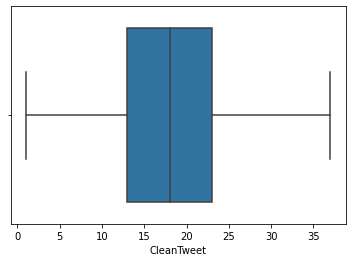

In [46]:
sns.boxplot(df3['CleanTweet'].astype(str).str.split().str.len())

In [47]:
# tokenizing

In [48]:
df3['CleanTweet'] = df3['CleanTweet'].apply(nltk.word_tokenize) 

In [49]:
df3.head()

,OriginalTweet,Sentiment,CleanTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,"[trending, encounter, empty, supermarket, shel..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, turned, a..."
2,Find out how you can protect yourself and love...,Positive,"[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronav..."


In [50]:
df4=df3

In [51]:
# Stemming

In [52]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
df4['stemmed'] = df3['CleanTweet'].apply(lambda x: [stemmer.stem(y) for y in x])


In [53]:
df4.head()

,OriginalTweet,Sentiment,CleanTweet,stemmed
0,TRENDING: New Yorkers encounter empty supermar...,Negative,"[trending, encounter, empty, supermarket, shel...","[trend, encount, empti, supermarket, shelv, pi..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, turned, a...","[find, hand, sanit, fred, meyer, turn, amazon,..."
2,Find out how you can protect yourself and love...,Positive,"[find, protect, loved, ones, coronavirus]","[find, protect, love, one, coronaviru]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[panic, buying, hits, newyork, city, anxious, ...","[panic, buy, hit, newyork, citi, anxiou, shopp..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpap, dunnypap, coronaviru, coronavirusa..."


In [54]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df4['lemmed'] = df3['CleanTweet'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [55]:
df4.head()

,OriginalTweet,Sentiment,CleanTweet,stemmed,lemmed
0,TRENDING: New Yorkers encounter empty supermar...,Negative,"[trending, encounter, empty, supermarket, shel...","[trend, encount, empti, supermarket, shelv, pi...","[trending, encounter, empty, supermarket, shel..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, turned, a...","[find, hand, sanit, fred, meyer, turn, amazon,...","[find, hand, sanitizer, fred, meyer, turned, a..."
2,Find out how you can protect yourself and love...,Positive,"[find, protect, loved, ones, coronavirus]","[find, protect, love, one, coronaviru]","[find, protect, loved, one, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[panic, buying, hits, newyork, city, anxious, ...","[panic, buy, hit, newyork, citi, anxiou, shopp...","[panic, buying, hit, newyork, city, anxious, s..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpap, dunnypap, coronaviru, coronavirusa...","[toiletpaper, dunnypaper, coronavirus, coronav..."


In [56]:
nutral = df4[['lemmed','stemmed']] [df4['Sentiment'] == 'Neutral']
positive = df4[['lemmed','stemmed']] [df4['Sentiment'] == 'Positive']
negative = df4[['lemmed','stemmed']] [df4['Sentiment'] == 'Negative']
nutral.head()

,lemmed,stemmed
4,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpap, dunnypap, coronaviru, coronavirusa..."
5,"[remember, last, time, paid, gallon, regular, ...","[rememb, last, time, paid, gallon, regular, ga..."
7,"[cant, stop, covid, without, protecting, healt...","[cant, stop, covid, without, protect, healthwo..."
17,"[youre, stockpiling, food, amp, supply, buy, e...","[your, stockpil, food, amp, suppli, buy, extra..."
34,"[due, brexit, gt, gt, supermarket, begin, food...","[due, brexit, gt, gt, supermarket, begin, food..."


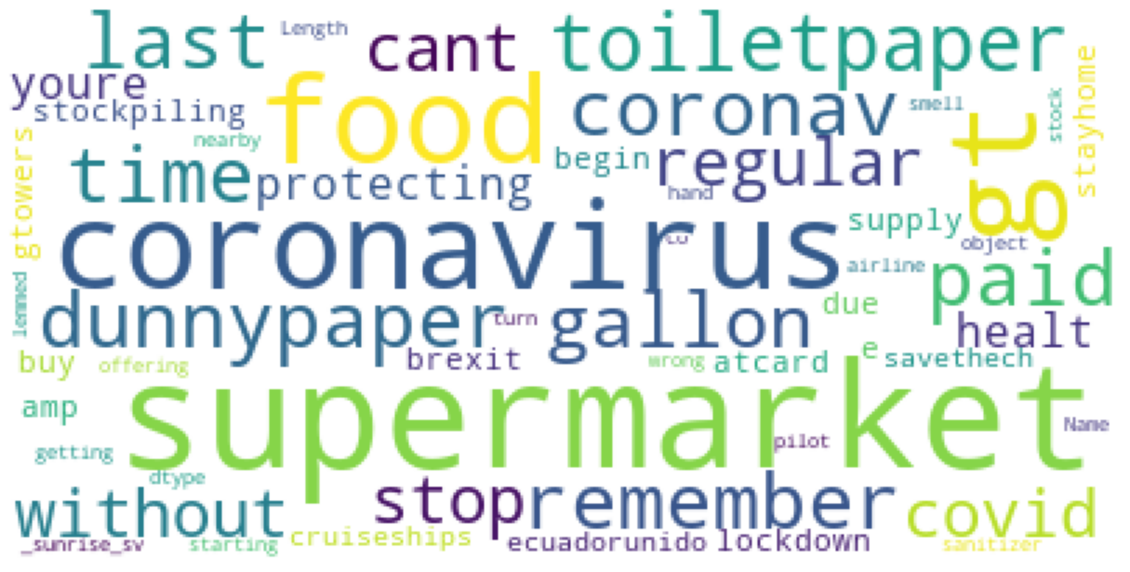

In [57]:
wc = WordCloud(background_color='white')
wc.generate(str(nutral['lemmed']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

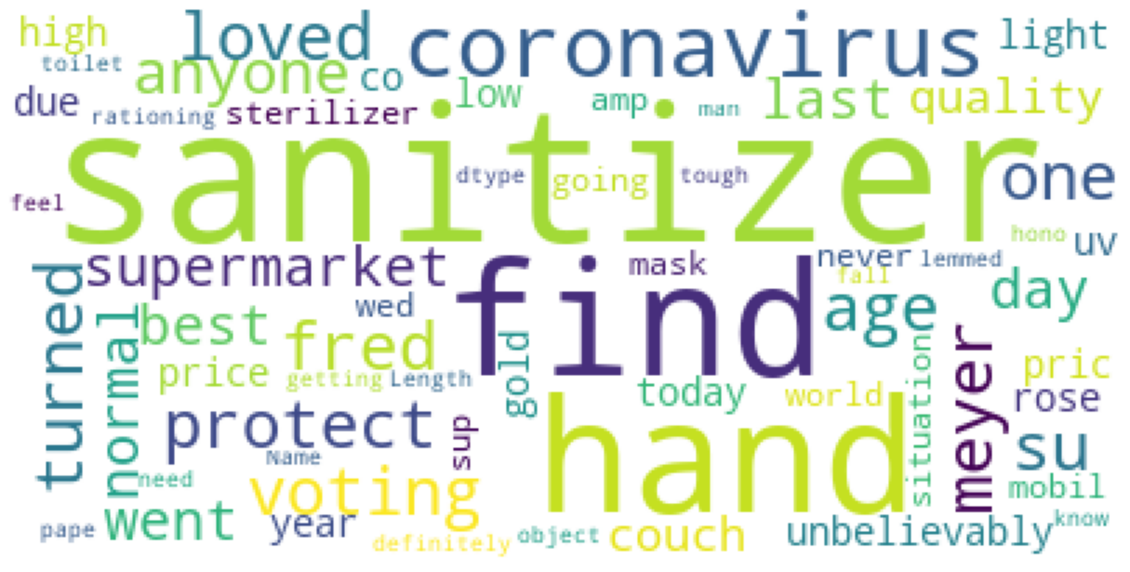

In [58]:
wc.generate(str(positive['lemmed']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

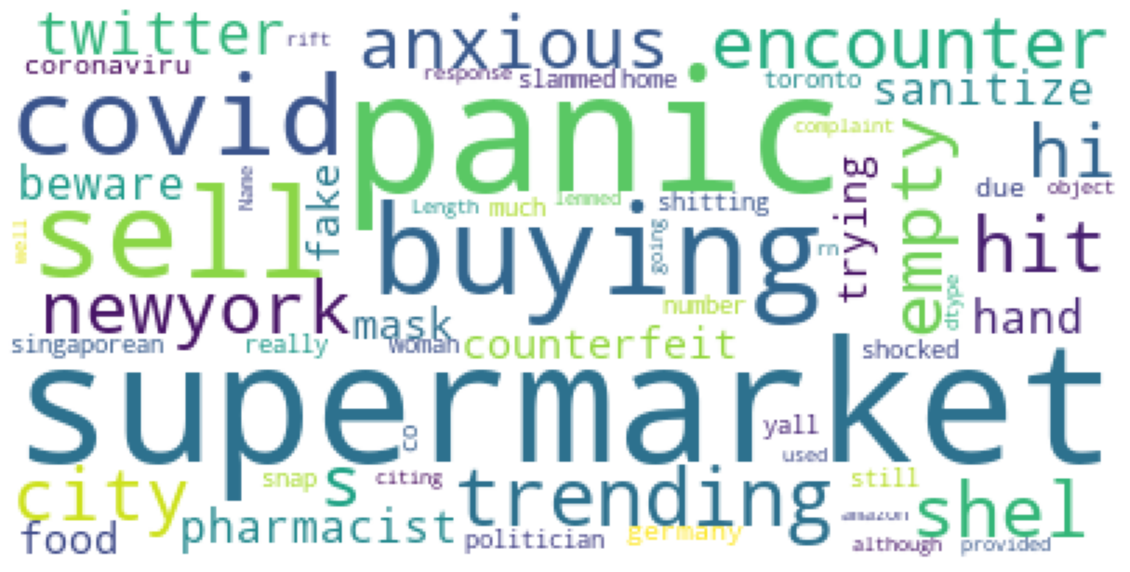

In [59]:
wc.generate(str(negative['lemmed']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [60]:
#train and test split

In [61]:
X=df4['lemmed']
y=df4['Sentiment'].values

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [63]:
X_train.head()

20074    [live, daily, london, coronavirus, update, foo...
16043    [people, stock, piled, meat, toilet, roll, dog...
31320    [thing, panic, buying, give, u, sense, control...
34883    [noted, consumer, behavior, indonesia, shifted...
42589    [consumer, gdp, mckinsey, report, show, covid,...
Name: lemmed, dtype: object

# Model Creation

In [64]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [65]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [66]:
cv_X_train.shape

(31453, 18806)

In [67]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [68]:
tv_X_train.shape

(31453, 18806)

In [69]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

# Bag of Word

In [70]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr_cv=LogisticRegression()

lr_cv.fit(cv_X_train,y_train)

pred_lr_cv=lr_cv.predict(cv_X_test)

In [71]:
pred_lr_cv

array(['Neutral', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [72]:
# Accuracy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

cv_score_lr_cv= cross_val_score(lr_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_lr_cv)))

Accuracy: 0.7790990182305506


In [73]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_cv))
pd.DataFrame(confusion_matrix(y_test,pred_lr_cv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.81      0.79      0.80      5108
     Neutral       0.65      0.69      0.67      2495
    Positive       0.83      0.82      0.83      5877

    accuracy                           0.78     13480
   macro avg       0.76      0.77      0.76     13480
weighted avg       0.79      0.78      0.78     13480



,Neutral,Positive,Negative
Neutral,4012,477,619
Positive,393,1712,390
Negative,571,459,4847


In [74]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_cv=DecisionTreeClassifier()
dt_cv.fit(cv_X_train,y_train)
pred_dt_cv=dt_cv.predict(cv_X_test)

In [75]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6925253857745653


In [76]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))
pd.DataFrame(confusion_matrix(y_test,pred_dt_cv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.70      0.67      0.68      5108
     Neutral       0.63      0.68      0.65      2495
    Positive       0.74      0.74      0.74      5877

    accuracy                           0.70     13480
   macro avg       0.69      0.70      0.69     13480
weighted avg       0.70      0.70      0.70     13480



,Neutral,Positive,Negative
Neutral,3411,545,1152
Positive,409,1704,382
Negative,1060,475,4342


In [77]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_cv=RandomForestClassifier()
rf_cv.fit(cv_X_train,y_train)
pred_rf_cv=rf_cv.predict(cv_X_test)

In [78]:
# Accuracy
cv_score_rf_cv= cross_val_score(rf_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_rf_cv)))

Accuracy: 0.7505483418283216


In [79]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_rf_cv))
pd.DataFrame(confusion_matrix(y_test,pred_rf_cv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76      5108
     Neutral       0.69      0.72      0.70      2495
    Positive       0.78      0.81      0.80      5877

    accuracy                           0.76     13480
   macro avg       0.75      0.75      0.75     13480
weighted avg       0.77      0.76      0.76     13480



,Neutral,Positive,Negative
Neutral,3759,440,909
Positive,304,1788,403
Negative,740,380,4757


# TF/IDF

In [80]:
lr_tv=LogisticRegression()

lr_tv.fit(tv_X_train,y_train)

pred_lr_tv=lr_tv.predict(tv_X_test)

In [81]:
pred_lr_tv

array(['Neutral', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [82]:
# Accuracy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

cv_score_lr_tv= cross_val_score(lr_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_lr_tv)))

Accuracy: 0.7715638536794811


In [83]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv))
pd.DataFrame(confusion_matrix(y_test,pred_lr_tv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      5108
     Neutral       0.72      0.58      0.64      2495
    Positive       0.80      0.85      0.83      5877

    accuracy                           0.79     13480
   macro avg       0.77      0.75      0.76     13480
weighted avg       0.78      0.79      0.78     13480



,Neutral,Positive,Negative
Neutral,4124,281,703
Positive,502,1449,544
Negative,579,279,5019


In [84]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_tv=DecisionTreeClassifier()
dt_tv.fit(tv_X_train,y_train)
pred_dt_tv=dt_tv.predict(tv_X_test)

In [85]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6133279555748629


In [86]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))
pd.DataFrame(confusion_matrix(y_test,pred_dt_tv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.63      0.60      0.62      5108
     Neutral       0.49      0.57      0.52      2495
    Positive       0.68      0.67      0.68      5877

    accuracy                           0.62     13480
   macro avg       0.60      0.61      0.61     13480
weighted avg       0.63      0.62      0.62     13480



,Neutral,Positive,Negative
Neutral,3053,769,1286
Positive,547,1425,523
Negative,1215,740,3922


In [87]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_tv=RandomForestClassifier()
rf_tv.fit(tv_X_train,y_train)
pred_rf_tv=rf_tv.predict(tv_X_test)

In [88]:
# Accuracy
cv_score_rf_tv= cross_val_score(rf_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_rf_tv)))

Accuracy: 0.7131590818286097


In [89]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_rf_tv))
pd.DataFrame(confusion_matrix(y_test,pred_rf_tv),index=label,columns=label)

              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      5108
     Neutral       0.62      0.61      0.61      2495
    Positive       0.75      0.79      0.77      5877

    accuracy                           0.73     13480
   macro avg       0.71      0.70      0.70     13480
weighted avg       0.73      0.73      0.73     13480



,Neutral,Positive,Negative
Neutral,3641,480,987
Positive,413,1511,571
Negative,786,449,4642


In [90]:
# score camparision

In [91]:
cv_score = {'Model':  ['Logistic Regression', 'Decision Tree','Random Forest'],
        'CountVector':  [np.mean(cv_score_lr_cv), np.mean(cv_score_dt_cv),np.mean(cv_score_rf_cv)],
        'TfidfVector': [np.mean(cv_score_lr_tv),np.mean(cv_score_dt_tv),np.mean(cv_score_rf_tv)]}

cv_score_table= pd.DataFrame (cv_score, columns = ['Model','CountVector','TfidfVector'])

cv_score_table

,Model,CountVector,TfidfVector
0,Logistic Regression,0.779099,0.771564
1,Decision Tree,0.692525,0.613328
2,Random Forest,0.750548,0.713159


best model is Logistic Regression with Count vectorizer

In [92]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [93]:
pipe_lr_cv = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [94]:
pipe_lr_cv.fit(X.astype(str).str.strip(),y)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [95]:
ex1 = "i said no"

In [96]:
pipe_lr_cv.predict([ex1])


array(['Neutral'], dtype=object)

In [97]:
# save the model to disk
import pickle

filename = 'finalized_model.pkl'
pickle.dump(pipe_lr_cv, open(filename, 'wb'))